In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [11]:
cnn = nets.RGBANet()

CNN configuration: 
    Our CNN with image, prob, merged_array, border_overlap as RGBA.
    


In [4]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1')

Loaded /home/d/patches/cylinder_small1/ in 0.00253796577454 seconds.


In [5]:
X_train_rgba = np.concatenate((X_train['image'], 
                               X_train['prob'], 
                               X_train['merged_array'],
                               X_train['larger_border_overlap']), 1)

In [6]:
X_test_rgba = np.concatenate((X_test['image'], 
                              X_test['prob'], 
                              X_test['merged_array'],
                              X_test['larger_border_overlap']), 1)

In [12]:
cnn = cnn.fit(X_train_rgba, y_train)

# Neural Network with 386658 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     16x63x63
  2  pool1     16x31x31
  3  conv2     16x19x19
  4  pool2     16x9x9
  5  hidden3   256
  6  dropout3  256
  7  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.54357       0.43683      1.24435      0.80432  11.82s
      2       0.44456       0.40397      1.10047      0.82509  11.99s
      3       0.41504       0.38182      1.08701      0.83613  12.29s
      4       0.39056       0.36039      1.08372      0.84854  12.23s
      5       0.37330       0.34177      1.09225      0.86204  11.69s
      6       0.35814       0.33168      1.07976      0.86570  12.21s
      7       0.34049       0.31820      1.07002      0.86942  12.13s
      8       0.32637       0.31430      1.03838      0.87100  11.97s
      9      

In [13]:
# this is the score on cylinder_small1 with regularization and patience counter 50
cnn.score(X_test_rgba, y_test)

0.825920245398773

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

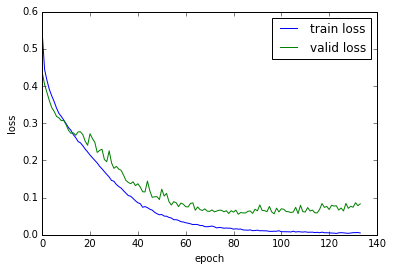

In [14]:
# this is the plot on cylinder_small1 with regularization and patience counter 50
plot_loss(cnn)

In [10]:
# this is the score on cylinder_small1 with regularization
cnn.score(X_test_rgba, y_test)

0.8136503067484663

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

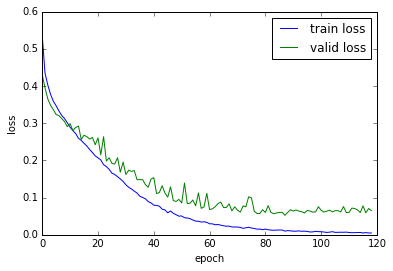

In [9]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)

In [7]:
# this is the score on cylinder_small1 without regularization
cnn.score(X_test_rgba, y_test)

0.8190184049079755

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

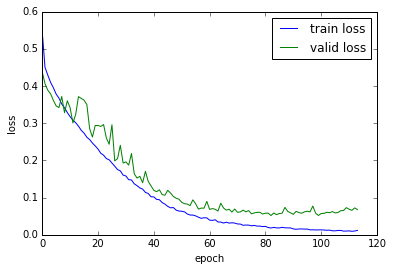

In [9]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)